<a href="https://colab.research.google.com/github/CE605A/Ajay-S_231030003/blob/main/CE605A_231030003_Programming_Assignment_Ajay_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

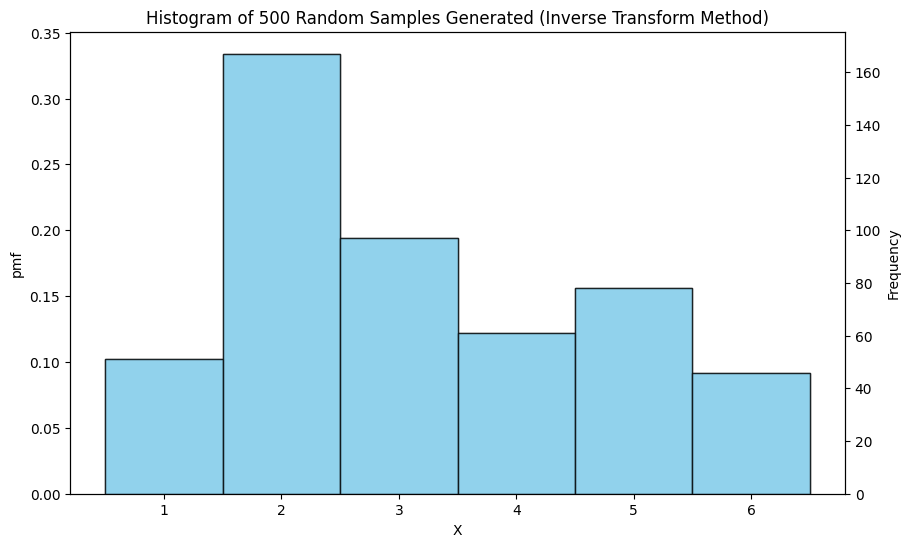

In [63]:
## Question 1(a)

import numpy as np
import matplotlib.pyplot as plt

#To define the PMF of the discrete distribution
pmf_values = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

#Cumulative distribution function (CDF)
cdf_values = np.cumsum(pmf_values)

#Inverse transform method to sample from the discrete distribution
def inverse_transform_sampling(cdf):
    u = np.random.rand()
    for i in range(len(cdf)):
        if u <= cdf[i]:
            return i + 1  #Adding 1 to get the actual random variable value

#Number of samples to generate
sample_size = 500

#To generate random samples using the inverse transform method
samples = [inverse_transform_sampling(cdf_values) for _ in range(sample_size)]


#To plot a histogram of the generated samples
fig, ax1 = plt.subplots(figsize=(10, 6))

#For plotting on the left y-axis (pmf)
ax1.set_title('Histogram of 500 Random Samples Generated (Inverse Transform Method)')
counts, bins, _ = ax1.hist(samples, bins=np.arange(1, 8) - 0.5, density=True, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('X')
ax1.set_ylabel('pmf', color='black')
ax1.tick_params(axis='y', labelcolor='black')

#For plotting the second y-axis for Frequency
ax2 = ax1.twinx()
ax2.hist(samples, bins=np.arange(1, 8) - 0.5, density=False, color='skyblue', edgecolor='black', alpha=0.7, label='Frequency')
ax2.set_ylabel('Frequency', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.show()




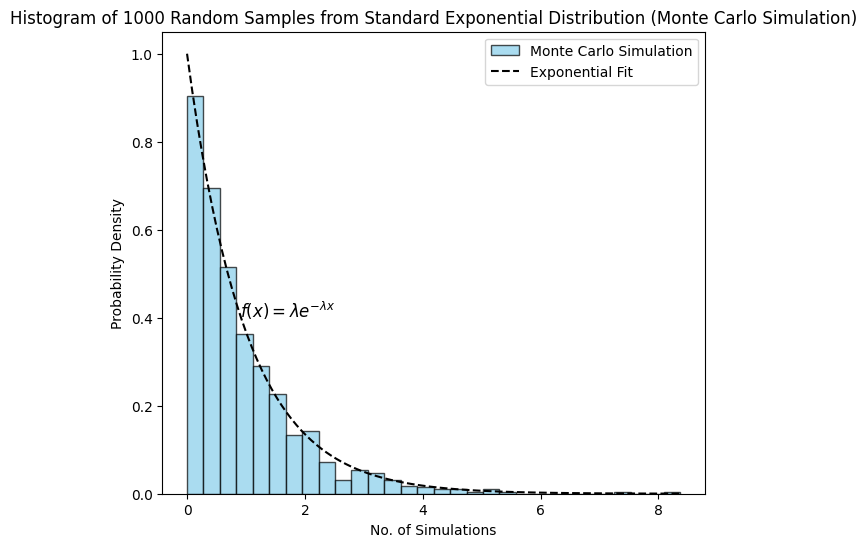

In [64]:
## Question 1(b)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_param = 1
num_simulations = 1000

# Inverse CDF function for exponential distribution
def inverse_cdf_exponential(u, lambda_param):
    return -np.log(1 - u) / lambda_param

# Generate random samples using the inverse transform method
def generate_exponential_samples(num_samples, lambda_param):
    u = np.random.rand(num_samples)
    return inverse_cdf_exponential(u, lambda_param)

# Generate 1000 random samples from the exponential distribution
samples = generate_exponential_samples(num_simulations, lambda_param)

# Plotting Histogram with Exponential Fit
fig, ax = plt.subplots(figsize=(7, 6))
counts, bins, _ = ax.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Monte Carlo Simulation')

# Overlaying Exponential PDF
x = np.linspace(0, max(samples), 100)
pdf = expon.pdf(x, scale=1/lambda_param)
ax.plot(x, pdf, color='black', linestyle='--', label='Exponential Fit')

# Adding Equation of Exponential Curve
equation = r'$f(x) = \lambda e^{-\lambda x}$'
# Adjusting the text coordinates to move it closer to the curve
ax.text(0.9, 0.4, equation, fontsize=12, color='black')

# Setting Axes Labels and Title
ax.set_xlabel('No. of Simulations')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram of 1000 Random Samples from Standard Exponential Distribution (Monte Carlo Simulation)')

# Adding Legend
ax.legend()

plt.show()



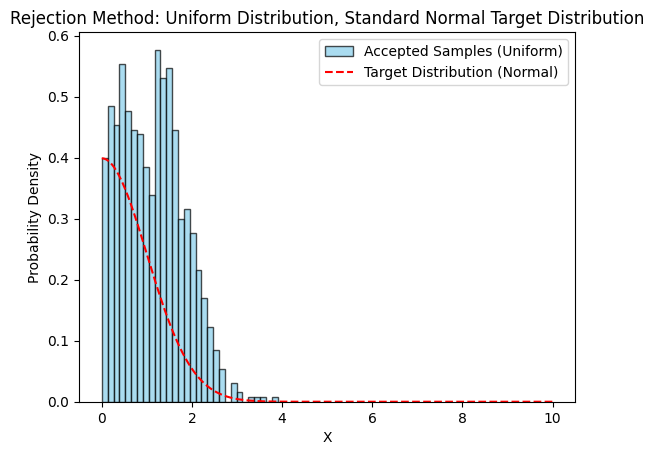

In [20]:
## Question 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the target distribution (PDF) - Standard Normal Distribution
def target_distribution(x):
    return norm.pdf(x)

# Define the proposal distribution (uniform)
def proposal_distribution(x, lower_bound, upper_bound):
    return 1 / (upper_bound - lower_bound)

# Number of samples to generate
sample_size = 1000

# Define lower bound and upper bound of uniform distribution
lower_bound = 0
upper_bound = 10

# Rejection method to sample from the target distribution
samples = []
while len(samples) < sample_size:
    x = np.random.uniform(lower_bound, upper_bound)
    y = np.random.uniform(0, proposal_distribution(x, lower_bound, upper_bound))
    if y <= target_distribution(x):
        samples.append(x)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Accepted Samples (Uniform)')
x_values = np.linspace(lower_bound, upper_bound, 1000)
plt.plot(x_values, target_distribution(x_values), 'r--', label='Target Distribution (Normal)')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Rejection Method: Uniform Distribution, Standard Normal Target Distribution')
plt.legend()
plt.show()



In [61]:
## BONUS


import numpy as np

#Define the parameters
sensitivity = 0.95 #P(Positive | Disease)
specificity = 0.90 #P(Negative | No Disease)
prevalence = 0.01  #P(Disease)

#Number of simulations
num_simulations = 1000

#Bayes Theorem to calculate positive predicted value
positive_predicted_formula = (sensitivity * prevalence) / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

#Simulation
simulated_results = np.random.rand(sample_size) < prevalence
positive_results = np.random.rand(sample_size) < sensitivity

#To calculate positive predicted value from the simulation
positive_predicted_simulation = np.sum(positive_results & simulated_results) / np.sum(positive_results)

print("Estimated probability that the person has the disease given a positive test result: (Formula): {:.4f}".format(positive_predicted_formula))
print("Estimated probability that the person has the disease given a positive test result: (Simulation): {:.4f}".format(positive_predicted_simulation))




Estimated probability that the person has the disease given a positive test result: (Formula): 0.0876
Estimated probability that the person has the disease given a positive test result: (Simulation): 0.0085
